<a href="https://colab.research.google.com/github/SANGUNDE/ML-/blob/main/Heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

In [ ]:
train_df = pd.read_csv('/content/heart_train.csv')
test_df = pd.read_csv('/content/heart_test.csv')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
train_df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,63,M,ATA,139,217,1,ST,128,Y,1.2,Flat,1
1,55,M,ATA,110,214,1,ST,180,N,0.4,Up,0
2,59,F,ASY,130,338,1,ST,130,Y,1.5,Flat,1
3,47,M,ASY,160,0,0,Normal,124,Y,0.0,Flat,1
4,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1


In [ ]:
test_df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,46,M,ASY,115,0,0,Normal,113,Y,1.5,Flat
1,58,M,NAP,132,224,0,LVH,173,N,3.2,Up
2,60,M,ASY,125,258,0,LVH,141,Y,2.8,Flat
3,49,M,NAP,120,188,0,Normal,139,N,2.0,Flat
4,39,F,NAP,138,220,0,Normal,152,N,0.0,Flat


In [ ]:
train_df['Sex'].value_counts()

,count
Sex,
M,579
F,155


In [ ]:
train_df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [ ]:
train_df['Cholesterol'].value_counts().head(5)

,count
Cholesterol,
0,129
223,10
230,9
254,9
211,9


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             734 non-null    int64  
 1   Sex             734 non-null    object 
 2   ChestPainType   734 non-null    object 
 3   RestingBP       734 non-null    int64  
 4   Cholesterol     734 non-null    int64  
 5   FastingBS       734 non-null    int64  
 6   RestingECG      734 non-null    object 
 7   MaxHR           734 non-null    int64  
 8   ExerciseAngina  734 non-null    object 
 9   Oldpeak         734 non-null    float64
 10  ST_Slope        734 non-null    object 
 11  HeartDisease    734 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 68.9+ KB


In [ ]:
train_df.describe()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000
mean,53.848774,132.874659,203.227520,0.228883,136.377384,0.865123,0.553134
std,9.440574,18.080330,108.402067,0.420400,25.832297,1.056964,0.497508
min,29.000000,92.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,180.000000,0.000000,119.000000,0.000000,0.000000
50%,55.000000,130.000000,225.000000,0.000000,138.000000,0.500000,1.000000
75%,61.000000,141.000000,269.750000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,5.600000,1.000000


In [ ]:
categorical_vals = train_df.select_dtypes(include='object')
numerical_vals = train_df.select_dtypes(include=['float64', 'int64'])

In [ ]:
encoder = OneHotEncoder()
categorical_encoded = encoder.fit_transform(categorical_vals)

categorical_encoded.toarray()

array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 1., 1., ..., 1., 0., 0.],
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 0., 1.]])

In [ ]:
categorical_encoded_array = categorical_encoded.toarray()
categorical_df = pd.DataFrame(categorical_encoded_array, columns=encoder.get_feature_names_out(categorical_vals.columns),
                              index=categorical_vals.index)

In [ ]:
categorical_df.head()

,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
train_final = pd.concat([numerical_vals, categorical_df],
                        axis=1)

train_final.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,63,139,217,1,128,1.2,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,55,110,214,1,180,0.4,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,59,130,338,1,130,1.5,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,47,160,0,0,124,0.0,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,50,145,0,1,139,0.7,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
#plit my data

train_final_x = train_final.drop('HeartDisease', axis=1)
train_final_y = train_final['HeartDisease']

columns = train_final_x.columns

In [ ]:
Scaler = StandardScaler()
scaled = Scaler.fit_transform(train_final_x)

In [ ]:
train = pd.DataFrame(scaled, columns=columns)

In [ ]:
train.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.970012,0.339016,0.127137,1.835497,-0.324520,0.317046,-0.51740,0.51740,-1.103414,2.096917,-0.5174,-0.240077,-0.498296,-1.247995,2.050774,-1.202775,1.202775,-0.26156,0.981105,-0.862246
1,0.122028,-1.266031,0.099443,1.835497,1.689837,-0.440356,-0.51740,0.51740,-1.103414,2.096917,-0.5174,-0.240077,-0.498296,-1.247995,2.050774,0.831411,-0.831411,-0.26156,-1.019259,1.159762
2,0.546020,-0.159102,1.244113,1.835497,-0.247045,0.601071,1.93274,-1.93274,0.906278,-0.476891,-0.5174,-0.240077,-0.498296,-1.247995,2.050774,-1.202775,1.202775,-0.26156,0.981105,-0.862246
3,-0.725956,1.501291,-1.876035,-0.544812,-0.479470,-0.819056,-0.51740,0.51740,0.906278,-0.476891,-0.5174,-0.240077,-0.498296,0.801285,-0.487621,-1.202775,1.202775,-0.26156,0.981105,-0.862246
4,-0.407962,0.671094,-1.876035,1.835497,0.101594,-0.156330,-0.51740,0.51740,0.906278,-0.476891,-0.5174,-0.240077,-0.498296,0.801285,-0.487621,-1.202775,1.202775,-0.26156,0.981105,-0.862246


In [ ]:
from re import X
#sppliting our data into test and train

X_train, X_test, y_train, y_test = train_test_split(train, train_final_y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, y_train.shape

((587, 20), (587,))

In [ ]:
Model_logistig = LogisticRegression()
Model_logistig.fit(X_train, y_train)

LogisticRegression()

In [ ]:
Model_logistig.predict(X_test)

array([0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1])

In [ ]:
#deploying cross validation

scores = cross_val_score(Model_logistig, X_train, y_train, cv=10)

In [ ]:
scores

array([0.79661017, 0.86440678, 0.81355932, 0.91525424, 0.86440678,
       0.88135593, 0.89830508, 0.77586207, 0.87931034, 0.87931034])

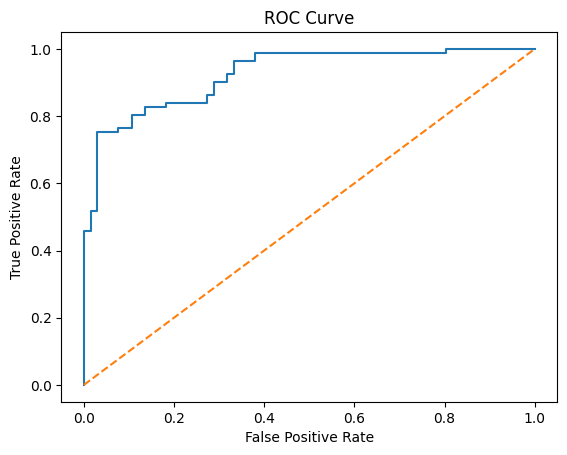

In [ ]:
#plotting the true positives against the false positives
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, Model_logistig.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, Model_logistig.predict(X_test))

array([[53, 13],
       [13, 68]])